# GOAL : clustering customers Analysis

----

>### Read data into DataFrame

In [2]:
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, ward
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('customers.csv').drop(columns=['ID'])
data

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0
1996,1,1,27,1,117744,1,0
1997,0,0,31,0,86400,0,0
1998,1,1,24,1,97968,0,0


--------------

>### Initial information

In [131]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Sex,2000.0,0.4570,0.498272,0.0,0.00,0.0,1.00,1.0
Marital status,2000.0,0.4965,0.500113,0.0,0.00,0.0,1.00,1.0
Age,2000.0,35.9090,11.719402,18.0,27.00,33.0,42.00,76.0
Education,2000.0,1.0380,0.599780,0.0,1.00,1.0,1.00,3.0
Income,2000.0,120954.4190,38108.824679,35832.0,97663.25,115548.5,138072.25,309364.0
Occupation,2000.0,0.8105,0.638587,0.0,0.00,1.0,1.00,2.0
Settlement size,2000.0,0.7390,0.812533,0.0,0.00,1.0,1.00,2.0


In [132]:
print(data.nunique())

Sex                   2
Marital status        2
Age                  58
Education             4
Income             1982
Occupation            3
Settlement size       3
dtype: int64


In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int64
 1   Marital status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement size  2000 non-null   int64
dtypes: int64(7)
memory usage: 109.5 KB


In [134]:
data.shape

(2000, 7)

In [135]:
data.isnull().any()

Sex                False
Marital status     False
Age                False
Education          False
Income             False
Occupation         False
Settlement size    False
dtype: bool

-------

># Statistical distribution

No handles with labels found to put in legend.


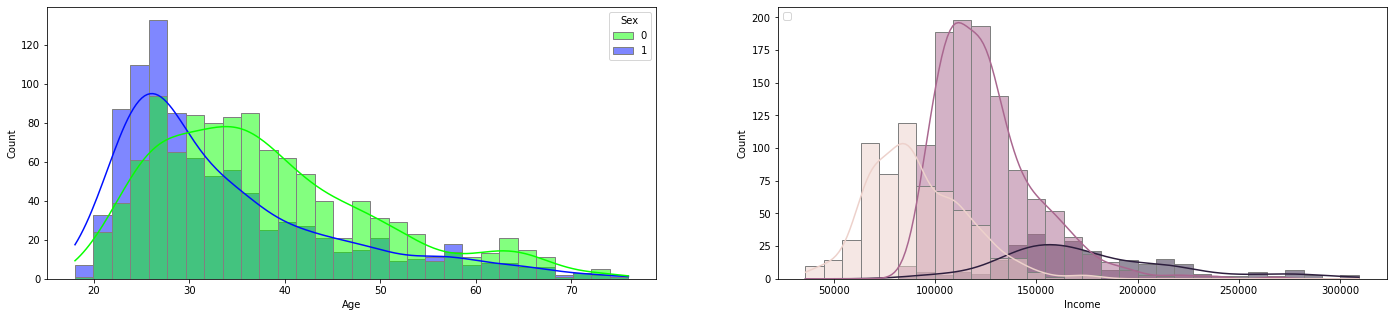

In [136]:
fig, axes = plt.subplots(1,2, figsize=(24, 5))

sns.histplot(data=data, x='Age', bins=30, hue='Sex', ax=axes[0], legend=True , kde=True ,palette = 'hsv' ,edgecolor='gray')
sns.histplot(data=data, x= 'Income', bins=30, hue='Occupation', ax=axes[1],legend=True , kde=True ,edgecolor='gray')
plt.legend(loc='upper left')

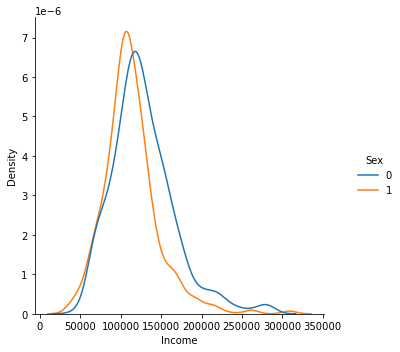

In [103]:
sns.displot(data, x='Income', kind="kde",hue='Sex')

-------------------

># groupby _cut

In [4]:
data['AGE groupby'] = pd.cut(data['Age'], bins=[17, 30, 40, 50, 60, 70], labels=['18-30', '31-40', '41-50', '51-60', '61->'])
data

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,AGE groupby
0,0,0,67,2,124670,1,2,61->
1,1,1,22,1,150773,1,2,18-30
2,0,0,49,1,89210,0,0,41-50
3,0,0,45,1,171565,1,1,41-50
4,0,0,53,1,149031,1,1,51-60
...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,41-50
1996,1,1,27,1,117744,1,0,18-30
1997,0,0,31,0,86400,0,0,31-40
1998,1,1,24,1,97968,0,0,18-30


### counting Customers based on ages

In [22]:
age18_30 = data.Age[(data.Age <= 30) & (data.Age >= 18)]
age31_40 = data.Age[(data.Age <= 40) & (data.Age >= 31)]
age41_50 = data.Age[(data.Age <= 50) & (data.Age >= 41)]
age51_60 = data.Age[(data.Age <= 60) & (data.Age >= 51)]
age60= data.Age[(data.Age >= 61)]

labels=['18-30', '31-40', '41-50', '51-60', '61->']
y = [len(age18_30.values) ,len(age31_40.values),len(age41_50.values),len(age51_60.values),len(age60.values)]

Text(0.5, 1.0, 'counting Customers based on ages')

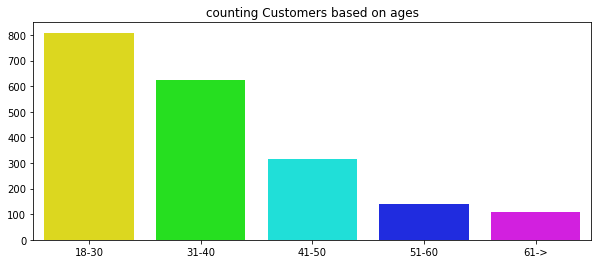

In [23]:
fig, axes = plt.subplots( figsize=(10, 4))
sns.barplot(x=labels , y=y, palette="hsv" )
plt.title("counting Customers based on ages")

<AxesSubplot:xlabel='AGE groupby', ylabel='Income'>

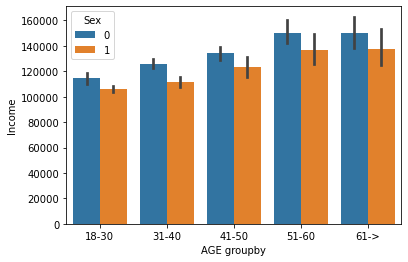

In [140]:
sns.barplot(x=data['AGE groupby'] , y=data['Income'],hue= data['Sex'] )

# |????|

In [100]:
#??????????????
data.groupby(['AGE groupby']).mean(['Income'])

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
AGE groupby,,,,,,,
18-30,0.601978,0.672435,25.645241,0.739184,109374.983931,0.737948,0.644005
31-40,0.359425,0.370607,35.145367,0.934505,120634.099042,0.849840,0.753994
41-50,0.347003,0.353312,45.104101,1.343849,130221.955836,0.791798,0.776025
51-60,0.390071,0.432624,54.921986,1.617021,145146.049645,0.971631,0.950355
>61,0.329670,0.406593,64.395604,2.197802,145847.043956,0.879121,0.989011


In [ ]:
data.groupby(['AGE groupby']).mean(['Income'])

# "plots" to get started

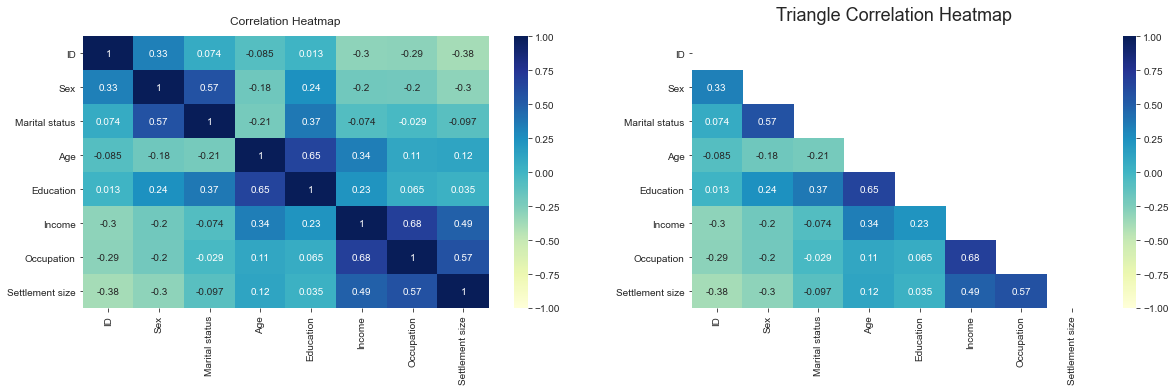

In [138]:
fig, axes = plt.subplots(1,2, figsize=(20, 5))
#heatmap corrolation
import seaborn as sns
heatmap = sns.heatmap(data.corr(), ax=axes[0] , vmin=-1, vmax=1, annot=True ,cmap="YlGnBu")
heatmap.set_title('Correlation Heatmap' , fontdict={'fontsize':12}, pad=12);
# triangle corrolation
mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))
heatmap = sns.heatmap(data.corr(),  vmin=-1, vmax=1, mask =mask , annot=True, cmap= "YlGnBu")
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

-------------

># pie plot

Text(0.5, 1.0, 'Settlement size')

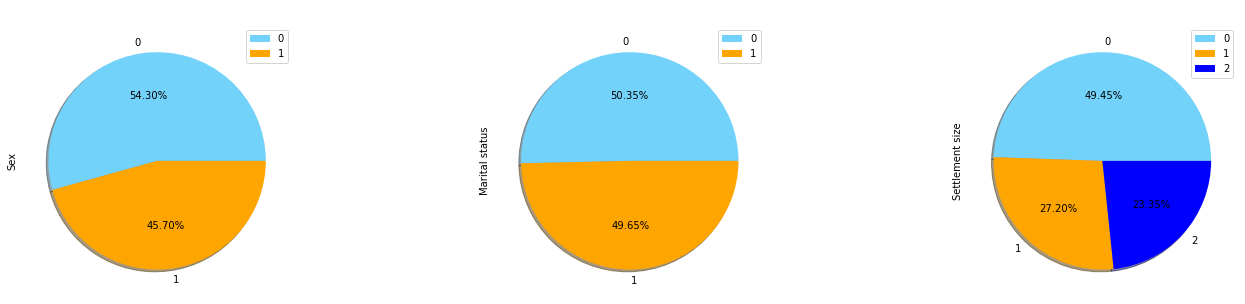

In [47]:
fig, axes = plt.subplots( 1,3 , figsize=(24, 5))
data['Sex'].value_counts().plot(kind = 'pie', legend = 1,autopct = '%0.2f%%', explode = None, shadow = True,
                                colors = ['#72d2f9', 'orange'],ax=axes[0])
plt.title('sex', fontsize = 15 ,c= 'white')

data['Marital status'].value_counts().plot(kind = 'pie', legend = 1,autopct = '%0.2f%%',  explode = None, shadow = True, 
                                           colors = ['#72d2f9', 'orange'],ax=axes[1])
plt.title('Marital status', fontsize = 15 ,c= 'white' ) 

data['Settlement size'].value_counts().plot(kind = 'pie', legend = 1,autopct = '%0.2f%%', explode = None, shadow = True,
                                            colors = ['#72d2f9', 'orange','b'],ax=axes[2])
plt.title('Settlement size', fontsize = 15 ,c= 'white' ) 

----------

># scatter plots

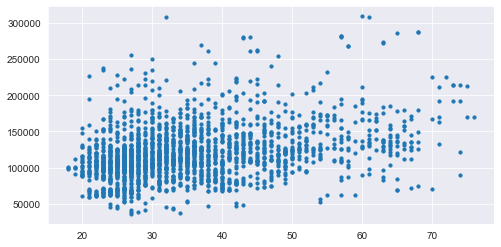

In [179]:
fig, axes = plt.subplots( figsize=(8, 4))
plt.scatter(data['Age'] , data['Income'] ,s=10 )

># regplot

<AxesSubplot:xlabel='Age', ylabel='Income'>

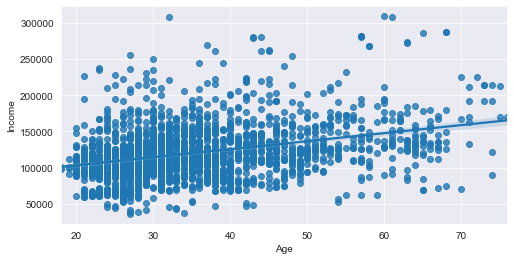

In [182]:
fig, axes = plt.subplots( figsize=(8, 4))
sns.regplot(x = data['Age'] , y = data['Income'])

># relplot

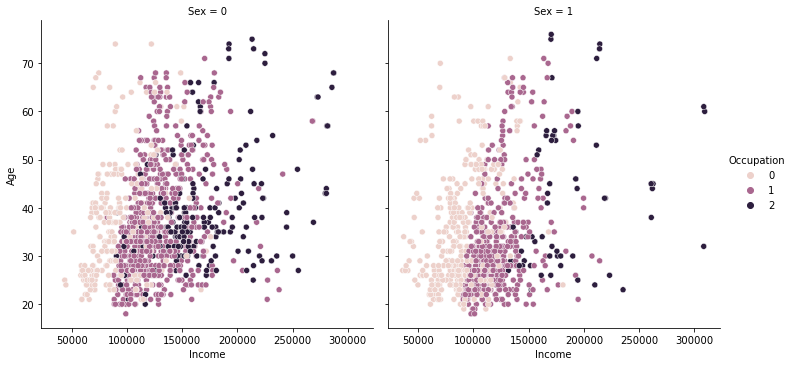

In [6]:
ax = sns.relplot( data=data, x="Income", y="Age", col="Sex",hue="Occupation")

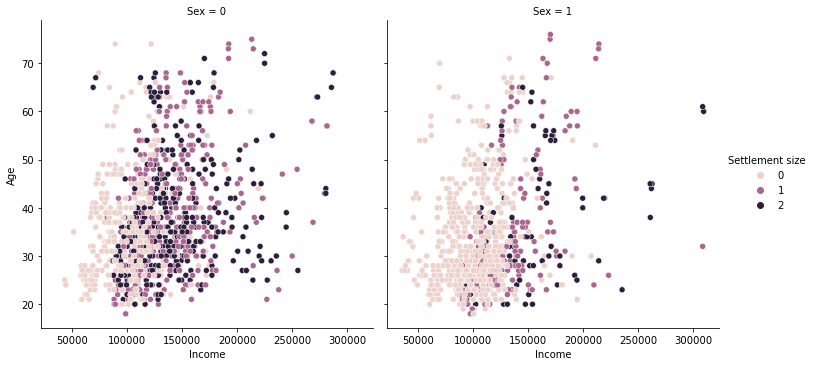

In [5]:
ax = sns.relplot( data=data, x="Income", y="Age", col="Sex",hue="Settlement size")

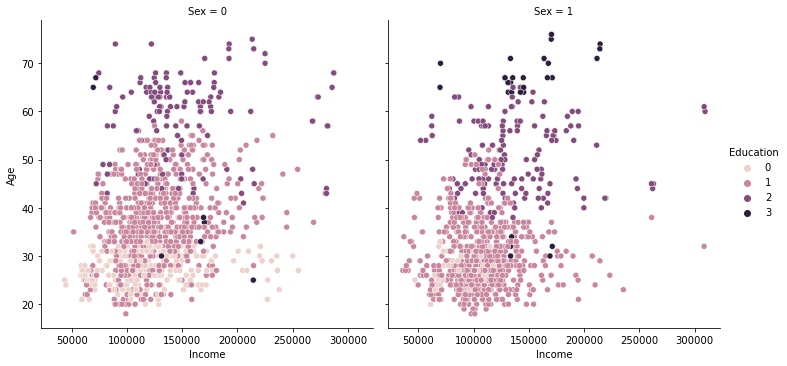

In [27]:
ax = sns.relplot( data=data, x="Income", y="Age", col="Sex",hue="Education")

---------------

# clustering Analysis : first, Clustering based on 2 features | age _income| 

In [15]:
# # preparing X 
X = np.array(data.iloc[: , [2,4]])

In [16]:
# scaling X
from sklearn.preprocessing import MinMaxScaler
X_MinMaxScaler = MinMaxScaler().fit_transform(X)

In [17]:
# clustering X
kmeans = KMeans(n_clusters = 5 , random_state= 0)
kmeans.fit(X_MinMaxScaler)

KMeans(n_clusters=5, random_state=0)

In [18]:
# predicting X
predict_clustr_customer = kmeans.fit_predict(X_MinMaxScaler)
predict_clustr_customer

array([2, 4, 3, ..., 1, 1, 1])

In [19]:
# counting Cluster sizes k-means
from collections import Counter
print(Counter(kmeans.fit(X_MinMaxScaler).labels_))

Counter({1: 737, 4: 499, 3: 446, 2: 218, 0: 100})


In [24]:
# adding "kmeanscluster" as Predicted cluster to data
data1 = data.drop(columns=['AGE groupby' ])
data_km= data1.copy()
data_km['kmeans cluster'] =predict_clustr_customer
data_km

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,kmeans cluster
0,0,0,67,2,124670,1,2,2
1,1,1,22,1,150773,1,2,4
2,0,0,49,1,89210,0,0,3
3,0,0,45,1,171565,1,1,0
4,0,0,53,1,149031,1,1,2
...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,3
1996,1,1,27,1,117744,1,0,1
1997,0,0,31,0,86400,0,0,1
1998,1,1,24,1,97968,0,0,1


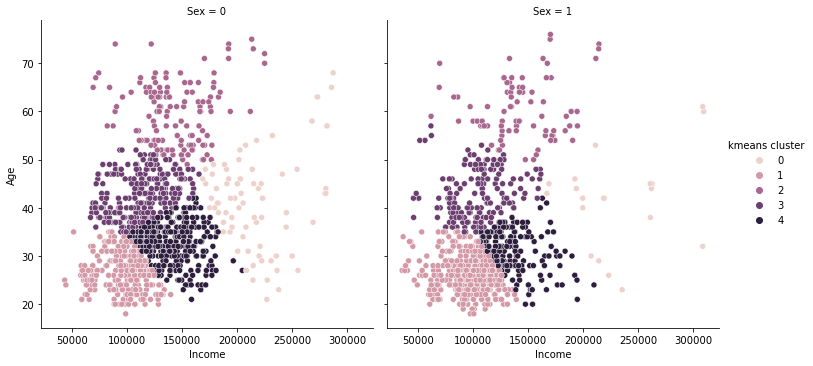

In [25]:
ax = sns.relplot( data=data, x="Income", y="Age", col="Sex",hue= data_km["kmeans cluster"])

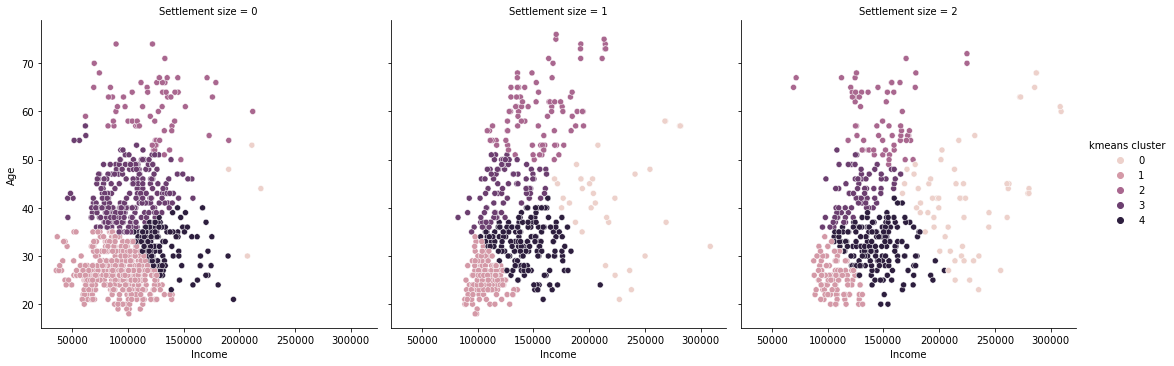

In [26]:
ax = sns.relplot( data=data, x="Income", y="Age", col="Settlement size",hue= data_km["kmeans cluster"])

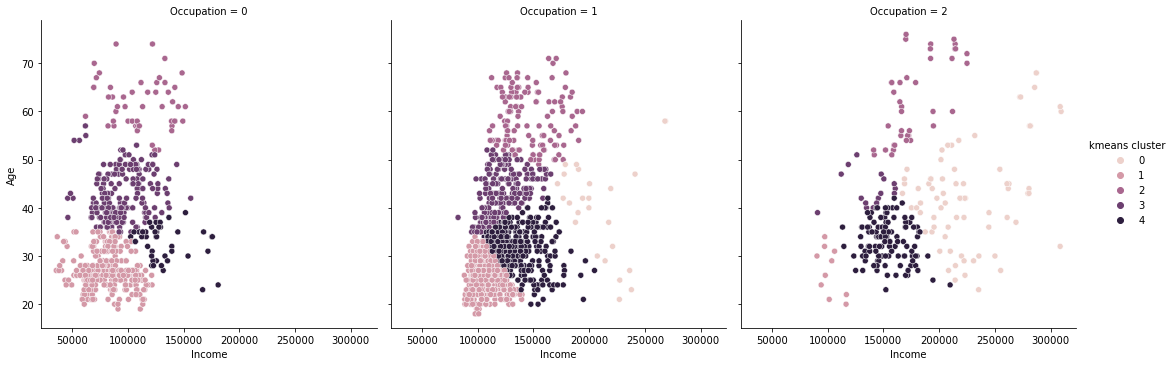

In [28]:
ax = sns.relplot( data=data, x="Income", y="Age", col="Occupation",hue= data_km["kmeans cluster"])

<AxesSubplot:ylabel='kmeans cluster'>

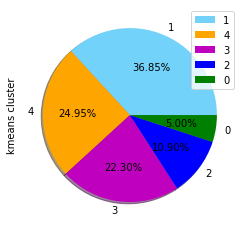

In [32]:
data_km["kmeans cluster"].value_counts().plot(kind = 'pie', legend = 1,autopct = '%0.2f%%', explode = None, shadow = True,
                                colors = ['#72d2f9', 'orange','m' , 'b' , 'g'])

># visualizing the K_means result | points ????? |

d:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


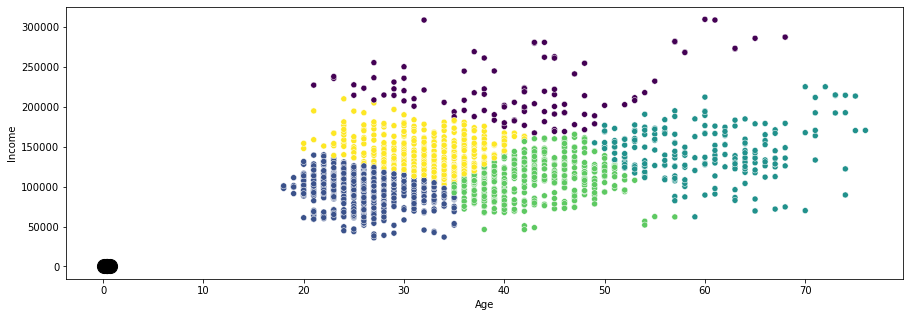

In [201]:
fig, axes = plt.subplots( figsize=(15,5))
sns.scatterplot(data_km['Age'] , data_km['Income'] , c= data_km['kmeans cluster'])
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200, c='black')

Text(0.5, 0, 'kmeans cluster')

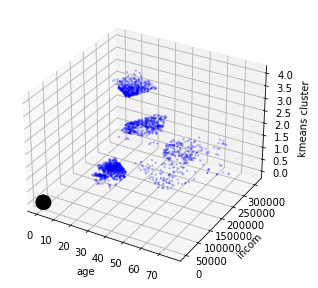

In [203]:
fig, ax = plt.subplots(figsize=(5,5) , subplot_kw={'projection': '3d'})
ax.scatter(data_km['Age'] , data_km['Income'] ,data_km['kmeans cluster'] ,s= 2 ,alpha=0.2 ,c= 'b')
ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200, c='black')
ax.set_xlabel('age')
ax.set_ylabel('incom')
ax.set_zlabel('kmeans cluster')

In [192]:
km.cluster_centers_

array([[0.4162069 , 0.68074657],
       [0.14157062, 0.21863061],
       [0.7246941 , 0.39285767],
       [0.42990836, 0.26768919],
       [0.24634483, 0.3772956 ]])

>## Elbow

<AxesSubplot:xlabel='k'>

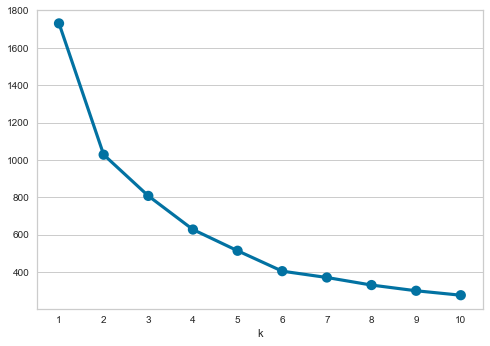

In [184]:
from sklearn.cluster import KMeans
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_MinMaxScaler)
    sse[k] = kmeans.inertia_

plt.xlabel('k')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))


In [180]:
#! pip install yellowbrick

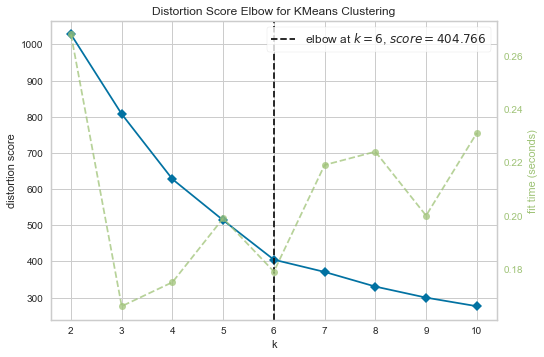

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [183]:
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans(random_state=0)
Visualizer = KElbowVisualizer (kmeans , k =(2 ,11))
Visualizer.fit(X_MinMaxScaler)
Visualizer.poof()

# clustering Analysis : first, Clustering based on all_features

In [3]:
data

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0
1996,1,1,27,1,117744,1,0
1997,0,0,31,0,86400,0,0
1998,1,1,24,1,97968,0,0


In [10]:
# # preparing X 
X = np.array(data.iloc[: , :])

In [11]:
# scaling X
from sklearn.preprocessing import MinMaxScaler
X_MinMaxScaler = MinMaxScaler().fit_transform(X)

In [12]:
# clustering X
kmeans = KMeans(n_clusters = 5 , random_state= 0)
kmeans.fit(X_MinMaxScaler)

KMeans(n_clusters=5, random_state=0)

In [13]:
# predicting X
predict_clustr_customer = kmeans.fit_predict(X_MinMaxScaler)
predict_clustr_customer

array([1, 0, 2, ..., 2, 0, 2])

In [14]:
# counting Cluster sizes k-means
from collections import Counter
print(Counter(kmeans.fit(X_MinMaxScaler).labels_))

Counter({0: 736, 1: 516, 2: 313, 4: 257, 3: 178})


In [24]:
# adding "kmeanscluster ALL" as Predicted cluster to data
data2 = data.drop(columns=['AGE groupby' ])
data_km2= data2.copy()
data_km2['kmeans cluster ALL'] =predict_clustr_customer
data_km2

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,kmeans cluster ALL
0,0,0,67,2,124670,1,2,1
1,1,1,22,1,150773,1,2,0
2,0,0,49,1,89210,0,0,2
3,0,0,45,1,171565,1,1,1
4,0,0,53,1,149031,1,1,1
...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,3
1996,1,1,27,1,117744,1,0,0
1997,0,0,31,0,86400,0,0,2
1998,1,1,24,1,97968,0,0,0


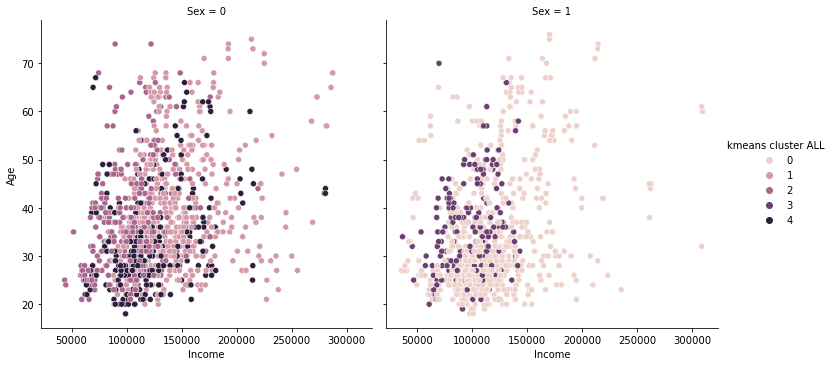

In [20]:
ax = sns.relplot( data=data_km2, x="Income", y="Age", col="Sex",hue= data_km2["kmeans cluster ALL"])

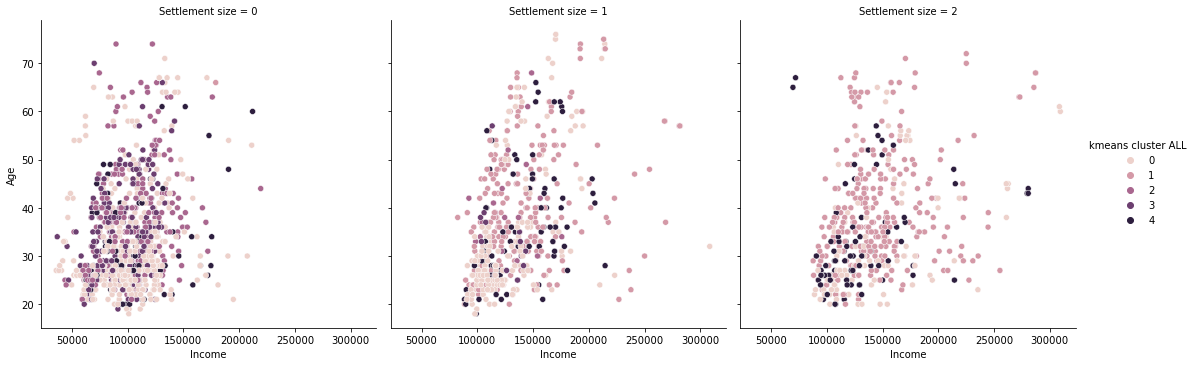

In [22]:
ax = sns.relplot( data=data_km2, x="Income", y="Age", col="Settlement size",hue= data_km2["kmeans cluster ALL"])

Text(0.5, 0, 'kmeans cluster')

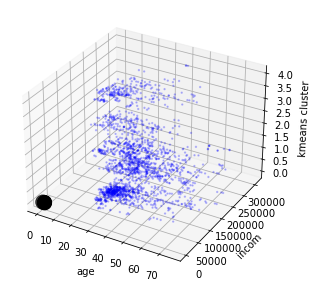

In [28]:
fig, ax = plt.subplots(figsize=(5,5) , subplot_kw={'projection': '3d'})
ax.scatter(data_km2['Age'] , data_km2['Income'] ,data_km2['kmeans cluster ALL'] ,s= 2 ,alpha=0.2 ,c= 'b')
ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200, c='black')
ax.set_xlabel('age')
ax.set_ylabel('incom')
ax.set_zlabel('kmeans cluster')

----------------

# Agglomerative Clustering


In [14]:
# preparing X 
X = np.array(data.iloc[: , [2,4]])

In [15]:
# scaling X
from sklearn.preprocessing import MinMaxScaler
X_MinMaxScaler = MinMaxScaler().fit_transform(X)

In [16]:
# clustering X
Agglomerativ = AgglomerativeClustering(n_clusters=3)
Agglomerati_clust = Agglomerativ.fit_predict(X_MinMaxScaler)
Agglomerati_clust

array([0, 2, 0, ..., 1, 1, 1], dtype=int64)

In [27]:
# adding 'Agglomerative cluster' as Predicted cluster to data
data_agglo = pd.DataFrame(X_MinMaxScaler).copy()
data_agglo['Agglomerative cluster'] =Agglomerati_clust
data_agglo

,0,1,Agglomerative cluster
0,0.844828,0.324781,0
1,0.068966,0.420210,2
2,0.534483,0.195144,0
3,0.465517,0.496223,0
4,0.603448,0.413842,0
...,...,...,...
1995,0.500000,0.320595,0
1996,0.155172,0.299460,1
1997,0.224138,0.184871,1
1998,0.103448,0.227162,1


># visualizing Agglomerative cluster result

Text(0.5, 0, 'Agglomerative cluster')

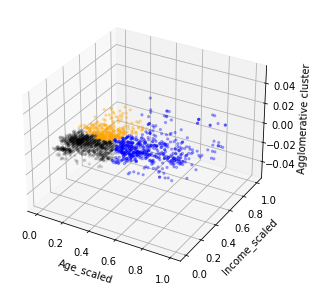

In [62]:
fig, ax = plt.subplots(figsize=(5,5) , subplot_kw={'projection': '3d'})

ax.scatter(data_agglo[0][data_agglo['Agglomerative cluster'] == 0], data_agglo[1][data_agglo['Agglomerative cluster'] == 0], c='blue', s=5 ,alpha=0.3)
ax.scatter(data_agglo[0][data_agglo['Agglomerative cluster'] == 1], data_agglo[1][data_agglo['Agglomerative cluster'] == 1], c='k', s=5,alpha=0.1 )
ax.scatter(data_agglo[0][data_agglo['Agglomerative cluster'] == 2], data_agglo[1][data_agglo['Agglomerative cluster'] == 2], c='orange', s=5,alpha=0.3)
plt.xlabel("Age_scaled")
plt.ylabel("Income_scaled")
ax.set_zlabel('Agglomerative cluster')

In [204]:
model = AgglomerativeClustering(distance_threshold=0,n_clusters=None)
model.fit(X)

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

-------

# DBSCAN

In [66]:
# preparing X 
X = np.array(data.iloc[: , [2,4]])

In [67]:
# scaling X
from sklearn.preprocessing import MinMaxScaler
X_MinMaxScaler = MinMaxScaler().fit_transform(X)

In [89]:
# clustering X
dbscan = DBSCAN(eps=0.09, min_samples=3)
dbscan_clust= dbscan.fit_predict(X_MinMaxScaler)

In [90]:
data_dbscan = pd.DataFrame(X_MinMaxScaler).copy()
data_dbscan['Dbscan cluster'] = dbscan_clust
data_dbscan

,0,1,Dbscan cluster
0,0.844828,0.324781,0
1,0.068966,0.420210,0
2,0.534483,0.195144,0
3,0.465517,0.496223,0
4,0.603448,0.413842,0
...,...,...,...
1995,0.500000,0.320595,0
1996,0.155172,0.299460,0
1997,0.224138,0.184871,0
1998,0.103448,0.227162,0


---------

# Result 

* Different strategies can be considered for each cluster
* By considering clusters, we can identify potential customers and increase profits through potential customers.
* setting advertisement baced on the clustering of customers.